## Chapter 5

### [5-2] 텐서플로 개념 익히기

In [4]:
import tensorflow as tf

tf.__version__

'2.1.0'

ERROR! Session/line number was not unique in database. History logging moved to new session 225


In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

* tf.random.uniform 

    [2, 3] => 2*3 행렬
    
    0, 1 => 0~1사이 난수 생성

In [2]:
a = tf.random.uniform([2, 3], 0, 1)
print(a)
print(type(a))

tf.Tensor(
[[0.6505729  0.13620126 0.8676996 ]
 [0.9879925  0.9339466  0.07436121]], shape=(2, 3), dtype=float32)
<class 'tensorflow.python.framework.ops.EagerTensor'>


* numpy와 tensorflow 호환

2.0버전부터는 두 라이브러리가 호환이 가능하다

In [3]:
import numpy as np

t = tf.random.uniform([2, 3], 0, 1)
n = np.random.uniform(0, 1, [2, 3])
print("tensorflow tensor : ", t)
print("numpy array : ", n)

# tensor + numpy array
print("sum result ; ",t+n) # => result = tensor

tensorflow tensor :  tf.Tensor(
[[0.6635717  0.6635963  0.18038845]
 [0.24398851 0.09374368 0.57751393]], shape=(2, 3), dtype=float32)
numpy array :  [[0.94866311 0.73253072 0.70701362]
 [0.42065428 0.53901471 0.74082213]]
sum result ;  tf.Tensor(
[[1.6122348  1.396127   0.88740206]
 [0.6646428  0.6327584  1.318336  ]], shape=(2, 3), dtype=float32)


* tensor의 구조

1. 0차원 tensor : 하나뿐인 스칼라 값
2. 1차원 텐서 : [1, 1.1, 2.2]
3. 2차원 텐서 : [[1, 1.1, 2.2], [1, 1.1, 2.2], [1, 1.1, 2.2]]
4. 3차원 텐서 
5. 4차원 텐서

#### tensorflow에서 제공하는 데이터 세트를 다운받아 tensor 구조 확인

In [4]:
import tensorflow.keras.datasets as ds

# [1] MNIST
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
print("MNIST Shape : ", x_train.shape, y_train.shape)

MNIST Shape :  (60000, 28, 28) (60000,)


In [5]:
y_train[0] # => one-hot encoding 적용

5

In [6]:
# tf.one_hot함수 사용
yy_train = tf.one_hot(y_train, 10, dtype=tf.int8) # 10개 클래스 기준
print("MNIST Shape : ", x_train.shape, y_train.shape, yy_train.shape)

MNIST Shape :  (60000, 28, 28) (60000,) (60000, 10)


In [7]:
yy_train[0]

<tf.Tensor: shape=(10,), dtype=int8, numpy=array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int8)>

* MNIST Shape :  (60000, 28, 28) (60000,) (60000, 10)

=> 입력 tensor : 60000 * 28 * 28 <br>
=> 출력 tensor : 60000 * 10 <br>

In [8]:
# [2] CIFAR-10
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
print("CIFAR-10 Shape : ", x_train.shape, y_train.shape)

# tf.one_hot함수 사용
yy_train = tf.one_hot(y_train, 10, dtype=tf.int8) # 10개 클래스 기준
print("CIFAR-10 Shape : ", x_train.shape, y_train.shape, yy_train.shape)

CIFAR-10 Shape :  (50000, 32, 32, 3) (50000, 1)
CIFAR-10 Shape :  (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)


* CIFAR-10 Shape : (50000, 32, 32, 3) (50000, 1) (50000, 1, 10)

=> 입력 tensor : 50000 * 32 * 32 * 3 <br>
=> 출력 tensor : 60000 * 1 * 10 <br>

### [5-3] 퍼셉트론 프로그래밍

#### [5-3-1] tensorflow

* OR 데이터 학습

In [9]:
# OR 데이터 구축
X = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
Y = [[-1], [1], [1], [1]]

In [10]:
W = tf.Variable([[1.0], [1.0]])
b = tf.Variable(-0.5)

# tf.add => numpy의 sum
# tf.matmul => numpt의 곱셈
s = tf.add(tf.matmul(X, W), b)
# tf.sign => step function 역할
o = tf.sign(s)

print(o)

tf.Tensor(
[[-1.]
 [ 1.]
 [ 1.]
 [ 1.]], shape=(4, 1), dtype=float32)


* 퍼셉트론 학습

입력 shape : 4 * 2 => 특징 벡터=2 <br>
출력 shape : 4 * 1 =>

In [11]:
# OR 데이터 구축
X = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
Y = [[-1], [1], [1], [1]]

In [12]:
# W (가중치) 초기화
W = tf.Variable(tf.random.uniform([2, 1], -0.5, 0.5))
b = tf.Variable(tf.zeros([1])) # zeros => 0으로 채우기

# 옵티마이저 => 기본 SGD
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

# 전방 계산식
def forward():
    s = tf.add(tf.matmul(X, W), b)
    o = tf.tanh(s) # 원래는 계단 함수인데, 미분하기 위해 tanh 사용
    return o

# 손실 함수 => cost function 계산 => J(w) 계산
def loss_function():
    o = forward()
    return tf.reduce_mean(tf.square(o-Y)) # 제곱 평균

# 학습
for epoch in range(500):
    # 학습 시키는 부분 => loss가 최소화하도록 한다.
    # 두번째 매개변수 var_list는 최적화 대상이다
    opt.minimize(loss_function, var_list=[W, b]) 
    if epoch%100 == 0:
        print("loss at epoch %d = " %epoch, loss_function().numpy()) # 손실 함수 값 출력
        

# 예측
o = forward()
print(o)

loss at epoch 0 =  0.8976301
loss at epoch 100 =  0.09206282
loss at epoch 200 =  0.042387567
loss at epoch 300 =  0.026628094
loss at epoch 400 =  0.019170627
tf.Tensor(
[[-0.81614536]
 [ 0.88634664]
 [ 0.88617665]
 [ 0.999264  ]], shape=(4, 1), dtype=float32)


o => 첫번째만 음수, 나머지는 양수로 옳게 인식한다!

#### [5-3-2] Keras로 퍼셉트론 프로그래밍

* Dense layer

- 완전 연결 되었다라는 뜻은 한 층의 모든 뉴런이 다음 층의 모든 뉴런과 연결된 상태를 말한다.
- 1차원 배열의 형태로 평탄화된 행렬을 통해 이미지 분류하는데 사용되는 계층이다.

(ex) flatten (2차원 -> 1차원) => relu => softmax

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [14]:
# OR 데이터 구축
X = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
Y = [[-1], [1], [1], [1]]

In [15]:
perceptron = Sequential()
perceptron.add(Dense(
    input_shape=(2, ), 
    units=1, 
    activation='tanh', 
    kernel_initializer='random_uniform', 
    bias_initializer='zeros'
))

In [ ]:
perceptron.compile(
    loss='mse',
    optimizer=SGD(learning_rate=0.1),
    metrics=['mse']
)

perceptron.fit(X, Y, epochs=500, verbose=2)

In [17]:
res = perceptron.predict(X)
print(res)

[[-0.81625944]
 [ 0.88633275]
 [ 0.88632834]
 [ 0.9992654 ]]


### [5-4] 다층 퍼셉트론 프로그래밍

#### [5-4-1] MNIST
* keras를 이용해 구현

In [18]:
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [19]:
# [1] MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("MNIST Shape : ", x_train.shape, y_train.shape)
print("MNIST Shape : ", x_test.shape, y_test.shape)

MNIST Shape :  (60000, 28, 28) (60000,)
MNIST Shape :  (10000, 28, 28) (10000,)


* 입력 : (60000, 28, 28)
* hidden layer : hidden_nodes=1024
* 출력 : class 0~9

In [20]:
# [1] 입력 shape 1차원 벡터로 변경 => dense layer를 사용하기 때문
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# [1-2] ndarray로 변환
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

# [2] 출력 shape => one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [21]:
input_dim=784 # flatten
n_hidden = 1024
output_dim=10

mlp = Sequential()
mlp.add(Dense(
    input_shape = (input_dim, ),
    units = 1024,
    activation='tanh',
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
mlp.add(Dense(
    units=output_dim,
    activation='softmax', # softmax
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))

mlp.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'mean_squared_error',
    metrics = ['accuracy']
)

history = mlp.fit(x_train, y_train, batch_size=128, epochs=15,
                 validation_data=(x_test, y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/15
60000/60000 - 3s - loss: 0.0152 - accuracy: 0.8989 - val_loss: 0.0107 - val_accuracy: 0.9306
Epoch 2/15
60000/60000 - 2s - loss: 0.0097 - accuracy: 0.9379 - val_loss: 0.0082 - val_accuracy: 0.9466
Epoch 3/15
60000/60000 - 2s - loss: 0.0071 - accuracy: 0.9539 - val_loss: 0.0063 - val_accuracy: 0.9598
Epoch 4/15
60000/60000 - 2s - loss: 0.0054 - accuracy: 0.9659 - val_loss: 0.0057 - val_accuracy: 0.9637
Epoch 5/15
60000/60000 - 3s - loss: 0.0044 - accuracy: 0.9725 - val_loss: 0.0049 - val_accuracy: 0.9683
Epoch 6/15
60000/60000 - 3s - loss: 0.0038 - accuracy: 0.9766 - val_loss: 0.0045 - val_accuracy: 0.9700
Epoch 7/15
60000/60000 - 2s - loss: 0.0031 - accuracy: 0.9809 - val_loss: 0.0042 - val_accuracy: 0.9727
Epoch 8/15
60000/60000 - 2s - loss: 0.0026 - accuracy: 0.9843 - val_loss: 0.0039 - val_accuracy: 0.9745
Epoch 9/15
60000/60000 - 2s - loss: 0.0023 - accuracy: 0.9863 - val_loss: 0.0040 - val_accuracy: 0.9733
Epoch 10/15
60

In [22]:
res = mlp.evaluate(x_test, y_test, verbose=0)

print("Accuracy : ", res[1]*100)

Accuracy :  97.9200005531311


ERROR! Session/line number was not unique in database. History logging moved to new session 219


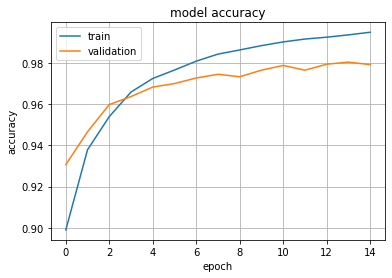

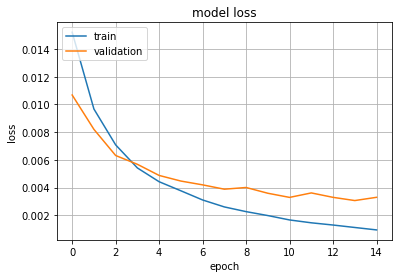

In [24]:
# 정확도 곡선
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 곡선
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

#### [5-4-2] Fashion MNIST
* keras를 이용해 구현

In [25]:
from tensorflow.keras.datasets import fashion_mnist

In [26]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

4423680/4422102 [==============================] - 2s 1us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [27]:
y_train[0]

9

In [28]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [29]:
# [1] input shape => flatten
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

# [1-2] ndarray로 변환
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

# [2] output one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [30]:
input_dim=784 # flatten
n_hidden = 1024
output_dim=10

mlp = Sequential()
mlp.add(Dense(
    input_shape = (input_dim, ),
    units = 1024,
    activation='tanh',
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
mlp.add(Dense(
    units=output_dim,
    activation='softmax', # softmax
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))

mlp.compile(
    optimizer = Adam(learning_rate=0.001),
    loss = 'mean_squared_error',
    metrics = ['accuracy']
)

history = mlp.fit(x_train, y_train, batch_size=128, epochs=25,
                 validation_data=(x_test, y_test), verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 - 3s - loss: 0.0282 - accuracy: 0.8005 - val_loss: 0.0245 - val_accuracy: 0.8318
Epoch 2/25
60000/60000 - 2s - loss: 0.0212 - accuracy: 0.8527 - val_loss: 0.0246 - val_accuracy: 0.8328
Epoch 3/25
60000/60000 - 2s - loss: 0.0198 - accuracy: 0.8636 - val_loss: 0.0229 - val_accuracy: 0.8445
Epoch 4/25
60000/60000 - 2s - loss: 0.0184 - accuracy: 0.8749 - val_loss: 0.0206 - val_accuracy: 0.8559
Epoch 5/25
60000/60000 - 2s - loss: 0.0175 - accuracy: 0.8801 - val_loss: 0.0196 - val_accuracy: 0.8652
Epoch 6/25
60000/60000 - 2s - loss: 0.0167 - accuracy: 0.8870 - val_loss: 0.0193 - val_accuracy: 0.8677
Epoch 7/25
60000/60000 - 2s - loss: 0.0163 - accuracy: 0.8888 - val_loss: 0.0180 - val_accuracy: 0.8768
Epoch 8/25
60000/60000 - 2s - loss: 0.0155 - accuracy: 0.8950 - val_loss: 0.0184 - val_accuracy: 0.8767
Epoch 9/25
60000/60000 - 2s - loss: 0.0151 - accuracy: 0.8979 - val_loss: 0.0181 - val_accuracy: 0.8742
Epoch 10/25
60

In [32]:
res = mlp.evaluate(x_test, y_test, verbose=0)

print("Accuracy : ", res[1]*100)

Accuracy :  88.41000199317932


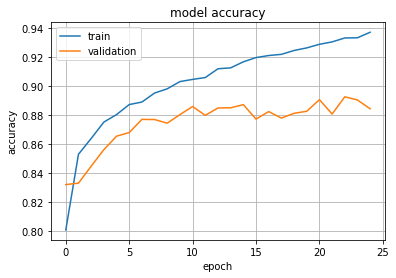

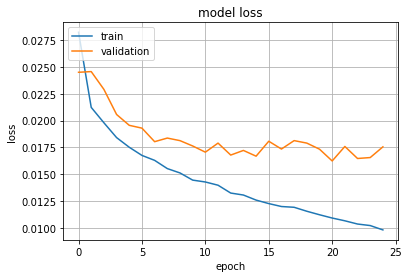

In [31]:
# 정확도 곡선
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 곡선
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

### [5-5] 깊은 다층 퍼셉트론 프로그래밍

* 은닉층 4개
* 데이터 = MNIST

* 가중치 초기화는 사실 생략해도 default로 glorot_uniform을 사용하게 된다

In [3]:
from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

import numpy as np

ERROR! Session/line number was not unique in database. History logging moved to new session 224


In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# [1] 입력 shape 1차원 벡터로 변경 => dense layer를 사용하기 때문
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
# [1-2] ndarray로 변환
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

# [2] 출력 shape => one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [7]:
## 위의 예시보다 더 깊어짐

input_dim = 784
output_dim = 10
hidden_1 = 1024
hidden_2 = 512
hidden_3 = 512
hidden_4 = 512

deep_mlp = Sequential()
deep_mlp.add(Dense(
    input_shape = (input_dim, ),
    units = hidden_1,
    activation = "tanh",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
deep_mlp.add(Dense(
    units = hidden_2,
    activation = "tanh",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
deep_mlp.add(Dense(
    units = hidden_3,
    activation = "tanh",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
deep_mlp.add(Dense(
    units = hidden_4,
    activation = "tanh",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
deep_mlp.add(Dense(
    units = output_dim,
    activation = "softmax",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))

deep_mlp.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse',
    metrics=['accuracy']
)

history = deep_mlp.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.2, verbose=2)

ERROR! Session/line number was not unique in database. History logging moved to new session 226
Train on 48000 samples, validate on 12000 samples
Epoch 1/30
48000/48000 - 6s - loss: 0.0160 - accuracy: 0.8928 - val_loss: 0.0110 - val_accuracy: 0.9292
Epoch 2/30
48000/48000 - 5s - loss: 0.0093 - accuracy: 0.9400 - val_loss: 0.0075 - val_accuracy: 0.9513
Epoch 3/30
48000/48000 - 5s - loss: 0.0070 - accuracy: 0.9556 - val_loss: 0.0063 - val_accuracy: 0.9606
Epoch 4/30
48000/48000 - 5s - loss: 0.0060 - accuracy: 0.9610 - val_loss: 0.0059 - val_accuracy: 0.9623
Epoch 5/30
48000/48000 - 5s - loss: 0.0050 - accuracy: 0.9680 - val_loss: 0.0058 - val_accuracy: 0.9629
Epoch 6/30
48000/48000 - 5s - loss: 0.0046 - accuracy: 0.9705 - val_loss: 0.0063 - val_accuracy: 0.9605
Epoch 7/30
48000/48000 - 5s - loss: 0.0041 - accuracy: 0.9736 - val_loss: 0.0052 - val_accuracy: 0.9678
Epoch 8/30
48000/48000 - 5s - loss: 0.0036 - accuracy: 0.9772 - val_loss: 0.0052 - val_accuracy: 0.9667
Epoch 9/30
48000/48000

정확도 :  97.53000140190125


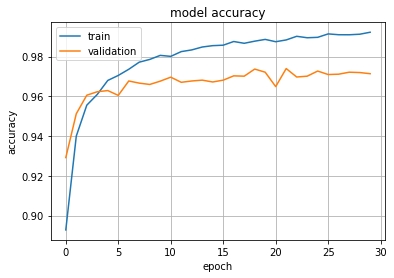

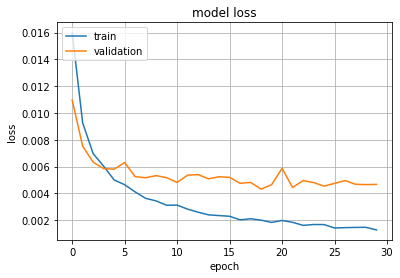

In [8]:
res = deep_mlp.evaluate(x_test, y_test, verbose=0)
print("정확도 : ", res[1]*100)

# 정확도 곡선
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

# 손실 곡선
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'validation'], loc='upper left')
plt.grid()
plt.show()

### [5-6] 손실 함수 성능 비교

* 데이터는 위의 MNIST 그대로 사용
* MSE와 Categorical_crossentropy 성능 비교

In [ ]:
## 위의 예시보다 더 깊어짐

input_dim = 784
output_dim = 10
hidden_1 = 1024
hidden_2 = 512
hidden_3 = 512
hidden_4 = 512

In [9]:
deep_mlp_mse = Sequential()
deep_mlp_mse.add(Dense(
    input_shape = (input_dim, ),
    units = hidden_1,
    activation = "tanh",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
deep_mlp_mse.add(Dense(
    units = hidden_2,
    activation = "tanh",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
deep_mlp_mse.add(Dense(
    units = hidden_3,
    activation = "tanh",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
deep_mlp_mse.add(Dense(
    units = hidden_4,
    activation = "tanh",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
deep_mlp_mse.add(Dense(
    units = output_dim,
    activation = "softmax",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))

deep_mlp_mse.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='mse', # mse 사용
    metrics=['accuracy']
)

history_mse = deep_mlp_mse.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=2)

ERROR! Session/line number was not unique in database. History logging moved to new session 227
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 5s - loss: 0.0158 - accuracy: 0.8942 - val_loss: 0.0108 - val_accuracy: 0.9293
Epoch 2/20
48000/48000 - 5s - loss: 0.0091 - accuracy: 0.9413 - val_loss: 0.0088 - val_accuracy: 0.9438
Epoch 3/20
48000/48000 - 5s - loss: 0.0071 - accuracy: 0.9537 - val_loss: 0.0066 - val_accuracy: 0.9576
Epoch 4/20
48000/48000 - 5s - loss: 0.0061 - accuracy: 0.9614 - val_loss: 0.0065 - val_accuracy: 0.9587
Epoch 5/20
48000/48000 - 5s - loss: 0.0050 - accuracy: 0.9678 - val_loss: 0.0061 - val_accuracy: 0.9610
Epoch 6/20
48000/48000 - 5s - loss: 0.0046 - accuracy: 0.9704 - val_loss: 0.0059 - val_accuracy: 0.9638
Epoch 7/20
48000/48000 - 5s - loss: 0.0041 - accuracy: 0.9741 - val_loss: 0.0059 - val_accuracy: 0.9624
Epoch 8/20
48000/48000 - 5s - loss: 0.0037 - accuracy: 0.9766 - val_loss: 0.0054 - val_accuracy: 0.9651
Epoch 9/20
48000/48000

In [14]:
deep_mlp_cse = Sequential()
deep_mlp_cse.add(Dense(
    input_shape = (input_dim, ),
    units = hidden_1,
    activation = "tanh",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
deep_mlp_cse.add(Dense(
    units = hidden_2,
    activation = "tanh",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
deep_mlp_cse.add(Dense(
    units = hidden_3,
    activation = "tanh",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
deep_mlp_cse.add(Dense(
    units = hidden_4,
    activation = "tanh",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))
deep_mlp_cse.add(Dense(
    units = output_dim,
    activation = "softmax",
    kernel_initializer='random_uniform', # weight 초기화
    bias_initializer='zeros' # bias 초기화
))

deep_mlp_cse.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy', # categorical_crossentropy 사용
    metrics=['accuracy']
)

history_cse = deep_mlp_cse.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 5s - loss: 0.3100 - accuracy: 0.9067 - val_loss: 0.1846 - val_accuracy: 0.9438
Epoch 2/20
48000/48000 - 5s - loss: 0.1559 - accuracy: 0.9527 - val_loss: 0.1681 - val_accuracy: 0.9516
Epoch 3/20
48000/48000 - 5s - loss: 0.1152 - accuracy: 0.9651 - val_loss: 0.1445 - val_accuracy: 0.9598
Epoch 4/20
48000/48000 - 5s - loss: 0.0855 - accuracy: 0.9734 - val_loss: 0.1243 - val_accuracy: 0.9613
Epoch 5/20
48000/48000 - 5s - loss: 0.0706 - accuracy: 0.9770 - val_loss: 0.1241 - val_accuracy: 0.9652
Epoch 6/20
48000/48000 - 5s - loss: 0.0580 - accuracy: 0.9812 - val_loss: 0.1240 - val_accuracy: 0.9679
Epoch 7/20
48000/48000 - 6s - loss: 0.0514 - accuracy: 0.9833 - val_loss: 0.1195 - val_accuracy: 0.9677
Epoch 8/20
48000/48000 - 5s - loss: 0.0382 - accuracy: 0.9877 - val_loss: 0.1092 - val_accuracy: 0.9707
Epoch 9/20
48000/48000 - 5s - loss: 0.0384 - accuracy: 0.9874 - val_loss: 0.1088 - val_accuracy: 0.9719
Epoch 10/20
48

In [15]:
res = deep_mlp_mse.evaluate(x_test, y_test, verbose=0)
print("MSE 정확도 : ", res[1]*100)

res = deep_mlp_cse.evaluate(x_test, y_test, verbose=0)
print("Cross-entropy 정확도 : ", res[1]*100)

MSE 정확도 :  97.15999960899353
Cross-entropy 정확도 :  97.42000102996826


정확도 :  97.53000140190125


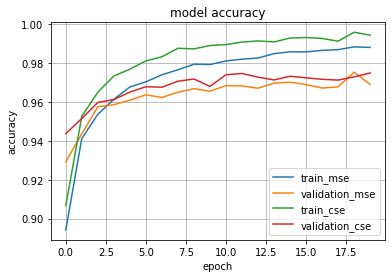

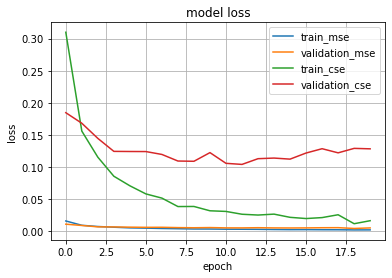

In [19]:
res = deep_mlp.evaluate(x_test, y_test, verbose=0)
print("정확도 : ", res[1]*100)

# 정확도 곡선
plt.plot(history_mse.history['accuracy'])
plt.plot(history_mse.history['val_accuracy'])
plt.plot(history_cse.history['accuracy'])
plt.plot(history_cse.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_mse', 'validation_mse', 'train_cse', 'validation_cse'], loc='lower right')
plt.grid()
plt.show()

# 손실 곡선
plt.plot(history_mse.history['loss'])
plt.plot(history_mse.history['val_loss'])
plt.plot(history_cse.history['loss'])
plt.plot(history_cse.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_mse', 'validation_mse', 'train_cse', 'validation_cse'], loc='upper right')
plt.grid()
plt.show()

### [5-7] 옵티마이저 성능 비교

* loss = categorical_crossentropy 
* 옵티마이저 = SGD, Adam, AdaGrad, RMSProp 옵티마이저 비교

In [20]:
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop

In [21]:
def build_model():
    input_dim = 784
    output_dim = 10
    hidden_1 = 1024
    hidden_2 = 512
    hidden_3 = 512
    hidden_4 = 512

    model = Sequential()
    model.add(Dense(input_shape = (input_dim, ), units = hidden_1, activation = "tanh"))
    model.add(Dense(units = hidden_2, activation = "tanh"))
    model.add(Dense(units = hidden_3, activation = "tanh"))
    model.add(Dense(units = hidden_4, activation = "tanh"))
    model.add(Dense(units = output_dim, activation = "softmax"))
    
    return model

In [22]:
# [1] SGD 
model_sgd = build_model()
model_sgd.compile(
    loss = 'categorical_crossentropy',
    optimizer = SGD(),
    metrics = ['accuracy']
)
hist_sgd = model_sgd.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=2)
print("SGD accuracy : ", model_sgd.evaluate(x_test, y_test, verbose=0)[1]*100)

# [1] Adam 
model_Adam = build_model()
model_Adam.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adam(),
    metrics = ['accuracy']
)
hist_Adam = model_Adam.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=2)
print("Adam accuracy : ", model_Adam.evaluate(x_test, y_test, verbose=0)[1]*100)

# [1] Adagrad 
model_Adagrad = build_model()
model_Adagrad.compile(
    loss = 'categorical_crossentropy',
    optimizer = Adagrad(),
    metrics = ['accuracy']
)
hist_Adagrad = model_Adagrad.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=2)
print("Adagrad accuracy : ", model_Adagrad.evaluate(x_test, y_test, verbose=0)[1]*100)

# [1] RMSprop 
model_RMSprop = build_model()
model_RMSprop.compile(
    loss = 'categorical_crossentropy',
    optimizer = RMSprop(),
    metrics = ['accuracy']
)
hist_RMSprop = model_RMSprop.fit(x_train, y_train, batch_size=128, epochs=20, validation_split=0.2, verbose=2)
print("RMSprop accuracy : ", model_RMSprop.evaluate(x_test, y_test, verbose=0)[1]*100)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 - 5s - loss: 0.7014 - accuracy: 0.8303 - val_loss: 0.3886 - val_accuracy: 0.8959
Epoch 2/20
48000/48000 - 5s - loss: 0.3725 - accuracy: 0.8962 - val_loss: 0.3234 - val_accuracy: 0.9089
Epoch 3/20
48000/48000 - 5s - loss: 0.3265 - accuracy: 0.9075 - val_loss: 0.2966 - val_accuracy: 0.9159
Epoch 4/20
48000/48000 - 5s - loss: 0.3027 - accuracy: 0.9136 - val_loss: 0.2811 - val_accuracy: 0.9209
Epoch 5/20
48000/48000 - 5s - loss: 0.2862 - accuracy: 0.9180 - val_loss: 0.2687 - val_accuracy: 0.9232
Epoch 6/20
48000/48000 - 5s - loss: 0.2732 - accuracy: 0.9216 - val_loss: 0.2590 - val_accuracy: 0.9265
Epoch 7/20
48000/48000 - 5s - loss: 0.2618 - accuracy: 0.9248 - val_loss: 0.2510 - val_accuracy: 0.9287
Epoch 8/20
48000/48000 - 5s - loss: 0.2516 - accuracy: 0.9279 - val_loss: 0.2441 - val_accuracy: 0.9318
Epoch 9/20
48000/48000 - 5s - loss: 0.2417 - accuracy: 0.9301 - val_loss: 0.2341 - val_accuracy: 0.9351
Epoch 10/20
48

정확도 :  97.53000140190125


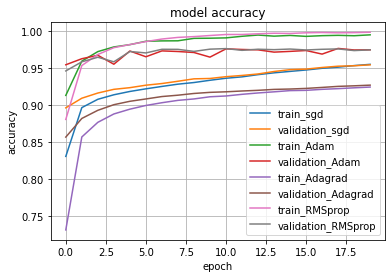

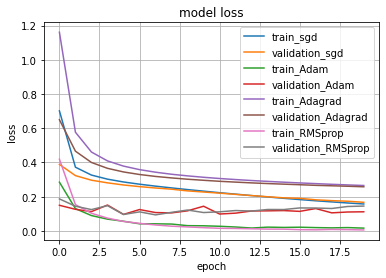

In [24]:
res = deep_mlp.evaluate(x_test, y_test, verbose=0)
print("정확도 : ", res[1]*100)

# 정확도 곡선
plt.plot(hist_sgd.history['accuracy'])
plt.plot(hist_sgd.history['val_accuracy'])
plt.plot(hist_Adam.history['accuracy'])
plt.plot(hist_Adam.history['val_accuracy'])
plt.plot(hist_Adagrad.history['accuracy'])
plt.plot(hist_Adagrad.history['val_accuracy'])
plt.plot(hist_RMSprop.history['accuracy'])
plt.plot(hist_RMSprop.history['val_accuracy'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_sgd', 'validation_sgd', 
            'train_Adam', 'validation_Adam',
            'train_Adagrad', 'validation_Adagrad',
            'train_RMSprop', 'validation_RMSprop'], loc='lower right')
plt.grid()
plt.show()

# 손실 곡선
plt.plot(hist_sgd.history['loss'])
plt.plot(hist_sgd.history['val_loss'])
plt.plot(hist_Adam.history['loss'])
plt.plot(hist_Adam.history['val_loss'])
plt.plot(hist_Adagrad.history['loss'])
plt.plot(hist_Adagrad.history['val_loss'])
plt.plot(hist_RMSprop.history['loss'])
plt.plot(hist_RMSprop.history['val_loss'])
plt.title('model loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_sgd', 'validation_sgd', 
            'train_Adam', 'validation_Adam',
            'train_Adagrad', 'validation_Adagrad',
            'train_RMSprop', 'validation_RMSprop'], loc='upper right')
plt.grid()
plt.show()